In [199]:
# Import libries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as dt
from scipy import stats
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score


In [200]:
# Import dataframes AND Specify a custom delimiter for the CSV input (sep=' ')

day_df=pd.read_csv(r'C:\Users\jspad\Documents\Code Academy\Biker Mice for Sharing Project\day.csv', sep=',')
hour_df=pd.read_csv(r'C:\Users\jspad\Documents\Code Academy\Biker Mice for Sharing Project\hour.csv',sep=',')

# Creating new column "hour"
h = pd.DataFrame(hour_df,columns=['hr'])
hour_df["Hour of the Day"] = hour_df["hr"].astype(str)

In [ ]:
# Data set day transformation - df2
# Rename
day_df=day_df.rename(columns={"dteday": "datetime",
                                "yr": "year",
                                "mnth": "month", 
                                "workingday": "is workingday",
                                "weathersit": "weather condition",
                                "hum":"humidity",
                                "cnt":"total"})

#Drop
df2=day_df.drop(['instant'], axis=1)

#Datetime
d = df2['datetime']
df2['datetime'] = pd.to_datetime(d)

df2.info()
df2

In [201]:
# Categorized Holiday + Season + Year + Month + working day + weathersit

hour_df.loc[hour_df['holiday'] == 0, 'holiday'] = 'No'
hour_df.loc[hour_df['holiday'] == 1, 'holiday'] = 'Yes'
hour_df.loc[hour_df['workingday'] == 0, 'workingday'] = 'No'
hour_df.loc[hour_df['workingday'] == 1, 'workingday'] = 'Yes'
hour_df.loc[hour_df['season'] == 1, 'season'] = 'Winter'
hour_df.loc[hour_df['season'] == 2, 'season'] = 'Spring'
hour_df.loc[hour_df['season'] == 3, 'season'] = 'Summer'
hour_df.loc[hour_df['season'] == 4, 'season'] = 'Fall'
hour_df.loc[hour_df['yr'] == 0, 'yr'] = '2011'
hour_df.loc[hour_df['yr'] == 1, 'yr'] = '2012'
hour_df.loc[hour_df['mnth'] == 1, 'mnth'] = 'Jan'
hour_df.loc[hour_df['mnth'] == 2, 'mnth'] = 'Feb'
hour_df.loc[hour_df['mnth'] == 3, 'mnth'] = 'Mar'
hour_df.loc[hour_df['mnth'] == 4, 'mnth'] = 'Apr'
hour_df.loc[hour_df['mnth'] == 5, 'mnth'] = 'May'
hour_df.loc[hour_df['mnth'] == 6, 'mnth'] = 'Jun'
hour_df.loc[hour_df['mnth'] == 7, 'mnth'] = 'Jul'
hour_df.loc[hour_df['mnth'] == 8, 'mnth'] = 'Ago'
hour_df.loc[hour_df['mnth'] == 9, 'mnth'] = 'Sep'
hour_df.loc[hour_df['mnth'] == 10, 'mnth'] = 'Oct'
hour_df.loc[hour_df['mnth'] == 11, 'mnth'] = 'Nov'
hour_df.loc[hour_df['mnth'] == 12, 'mnth'] = 'Dec'
hour_df.loc[hour_df['weekday'] == 0, 'weekday'] = 'Sunday'
hour_df.loc[hour_df['weekday'] == 1, 'weekday'] = 'Monday'
hour_df.loc[hour_df['weekday'] == 2, 'weekday'] = 'Tuesday'
hour_df.loc[hour_df['weekday'] == 3, 'weekday'] = 'Wednesday'
hour_df.loc[hour_df['weekday'] == 4, 'weekday'] = 'Thursday'
hour_df.loc[hour_df['weekday'] == 5, 'weekday'] = 'Friday'
hour_df.loc[hour_df['weekday'] == 6, 'weekday'] = 'Saturday'
hour_df.loc[hour_df['weathersit'] == 1, 'weathersit'] = 'Clear'
hour_df.loc[hour_df['weathersit'] == 2, 'weathersit'] = 'Cloudy'
hour_df.loc[hour_df['weathersit'] == 3, 'weathersit'] = 'Light Rain'
hour_df.loc[hour_df['weathersit'] == 4, 'weathersit'] = 'Heavy Rain'

In [202]:
# Transforming these labels into categrical data type

hour_df['holiday'] = pd.Categorical(hour_df['holiday'],
categories=['Yes', 'No'])

hour_df['workingday'] = pd.Categorical(hour_df['workingday'],
categories=['Yes', 'No'])

hour_df['season'] = pd.Categorical(hour_df['season'],
categories=['Winter', 'Spring', 'Summer', 'Fall'])

hour_df['weekday'] = pd.Categorical(hour_df['weekday'],
categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

hour_df['mnth'] = pd.Categorical(hour_df['mnth'],
categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dec'])

hour_df['yr'] = pd.Categorical(hour_df['yr'],
categories=['2011', '2012'])

hour_df['weathersit'] = pd.Categorical(hour_df['weathersit'],
categories=['Clear', 'Cloudy', 'Light Rain', 'Heavy Rain'])


In [59]:
# Creating new column "date" = dteday + hr
# df = pd.DataFrame(hour_df,columns=['dteday', 'yr','mnth','weekday','hr'])
# hour_df["date"] = df["dteday"].astype(str) + " " + df["hr"].astype(str)
# hour_df["date"] 

# Range Period hours
# dti = pd.date_range("2011-01-01", periods=17378, freq="H")
# dti

# Countining Hours 
# hr_df=pd.DataFrame(data=(hour_df['hr'].value_counts().reset_index())
# hr_df

In [203]:
#Convert time and date into timestamp objects 
t= hour_df['hr']
hour_df['hr'] = pd.to_datetime(t, format='%H').dt.time

d = hour_df['dteday']
hour_df['dteday'] = pd.to_datetime(d).dt.date


#Combine time and date into one column
hour_df['dteday'] = hour_df.apply(lambda r : pd.datetime.combine(r['dteday'],r['hr']),1)

# Rename
hour_df=hour_df.rename(columns={"dteday": "datetime",
                                "yr": "year",
                                "mnth": "month", 
                                "hr" : "hour", 
                                "workingday": "is workingday",
                                "weathersit": "weather condition",
                                "hum":"humidity",
                                "cnt":"total"})

# display
hour_df.info()

hour_df

<ipython-input-203-f6bf9faaeb83>:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  hour_df['dteday'] = hour_df.apply(lambda r : pd.datetime.combine(r['dteday'],r['hr']),1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  object        
 6   holiday            17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   is workingday      17379 non-null  category      
 9   weather condition  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

,instant,datetime,season,year,month,hour,holiday,weekday,is workingday,weather condition,temp,atemp,humidity,windspeed,casual,registered,total,Hour of the Day
0,1,2011-01-01 00:00:00,Winter,2011,Jan,00:00:00,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0000,3,13,16,0
1,2,2011-01-01 01:00:00,Winter,2011,Jan,01:00:00,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0000,8,32,40,1
2,3,2011-01-01 02:00:00,Winter,2011,Jan,02:00:00,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0000,5,27,32,2
3,4,2011-01-01 03:00:00,Winter,2011,Jan,03:00:00,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0000,3,10,13,3
4,5,2011-01-01 04:00:00,Winter,2011,Jan,04:00:00,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0000,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31 19:00:00,Winter,2012,Dec,19:00:00,No,Monday,Yes,Cloudy,0.26,0.2576,0.60,0.1642,11,108,119,19
17375,17376,2012-12-31 20:00:00,Winter,2012,Dec,20:00:00,No,Monday,Yes,Cloudy,0.26,0.2576,0.60,0.1642,8,81,89,20
17376,17377,2012-12-31 21:00:00,Winter,2012,Dec,21:00:00,No,Monday,Yes,Clear,0.26,0.2576,0.60,0.1642,7,83,90,21
17377,17378,2012-12-31 22:00:00,Winter,2012,Dec,22:00:00,No,Monday,Yes,Clear,0.26,0.2727,0.56,0.1343,13,48,61,22


In [ ]:
# Checking null values

# hour_df.isnull().sum()

In [204]:
# drop columns
df=hour_df.drop(['atemp'], axis=1)

# parse datetime colum & add new time related columns
dt = pd.DatetimeIndex(df['datetime'])
df.set_index(dt, inplace=True)

df.info()
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  object        
 6   holiday            17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   is workingday      17379 non-null  category      
 9   weather condition  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  humidity           17379 non-null  float64       
 12  windspeed          17379 non-null  float64       
 13  casual             17379 n

,instant,datetime,season,year,month,hour,holiday,weekday,is workingday,weather condition,temp,humidity,windspeed,casual,registered,total,Hour of the Day
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,2011-01-01 00:00:00,Winter,2011,Jan,00:00:00,No,Saturday,No,Clear,0.24,0.81,0.0000,3,13,16,0
2011-01-01 01:00:00,2,2011-01-01 01:00:00,Winter,2011,Jan,01:00:00,No,Saturday,No,Clear,0.22,0.80,0.0000,8,32,40,1
2011-01-01 02:00:00,3,2011-01-01 02:00:00,Winter,2011,Jan,02:00:00,No,Saturday,No,Clear,0.22,0.80,0.0000,5,27,32,2
2011-01-01 03:00:00,4,2011-01-01 03:00:00,Winter,2011,Jan,03:00:00,No,Saturday,No,Clear,0.24,0.75,0.0000,3,10,13,3
2011-01-01 04:00:00,5,2011-01-01 04:00:00,Winter,2011,Jan,04:00:00,No,Saturday,No,Clear,0.24,0.75,0.0000,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,17375,2012-12-31 19:00:00,Winter,2012,Dec,19:00:00,No,Monday,Yes,Cloudy,0.26,0.60,0.1642,11,108,119,19
2012-12-31 20:00:00,17376,2012-12-31 20:00:00,Winter,2012,Dec,20:00:00,No,Monday,Yes,Cloudy,0.26,0.60,0.1642,8,81,89,20
2012-12-31 21:00:00,17377,2012-12-31 21:00:00,Winter,2012,Dec,21:00:00,No,Monday,Yes,Clear,0.26,0.60,0.1642,7,83,90,21


In [ ]:
## Plot visualisation by days
# plt.figure(figsize=(20,15))
# plt.subplot(421)
# day_df['season'].plot.hist(bins=10, color='blue', label='Histogram of Season', edgecolor='black')
# plt.legend(loc='best')
# plt.subplot(422)
# day_df['weathersit'].plot.hist(bins=10, color='green', label='Histogram of Weather', edgecolor='black')
# plt.legend(loc='best')
# plt.subplot(423)
# day_df['hum'].plot.hist(bins=10, color='orange', label='Histogram of Humidity', edgecolor='black')
# plt.legend(loc='best')
# plt.subplot(424)
# day_df['holiday'].plot.hist(bins=10, color='pink', label='Histogram of Holiday', edgecolor='black')
# plt.legend(loc='best')
# plt.subplot(425)
# day_df['workingday'].plot.hist(bins=10, color='red', label='Histogram of Working Day', edgecolor='black')
# plt.legend(loc='best')
# plt.subplot(426)
# day_df['temp'].plot.hist(bins=10, color='yellow', label='Histogram of Temperature', edgecolor='black')
# plt.legend(loc='best')
# plt.subplot(427)
# day_df['atemp'].plot.hist(bins=10, color='cyan', label='Histogram of Feels Like Temp', edgecolor='black')
# plt.legend(loc='best')
# plt.subplot(428)
# day_df['windspeed'].plot.hist(bins=10, color='purple', label='Histogram of Windpseed', edgecolor='black')
# plt.legend(loc='best')
# plt.tight_layout();
# #plt.savefig('Histogram mix.png')

# df2= day_df.iloc[:, lambda day_df: [13, 14, 15]]
# df2.hist(bins=24, color='blue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
# plt.tight_layout(rect=(0, 0, 1.2, 1.2))
# rt = plt.suptitle('Distribution of counts', x=0.65, y=1.25, fontsize=15)
# #plt.savefig('Distribution of counts.png')

In [ ]:
# Boxplot of Count grouped by months and weather

fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x=df['month'], y=df['total'], ax=ax)
ax.set_ylabel('Count of Users')
ax.set_title("Boxplot of Count grouped by months");
#plt.savefig('Boxplot by Months.png')
#plt.suptitle("") # get rid of the pandas autogenerated title

fig, ax = plt.subplots(figsize=(18, 10))
sns.boxplot(x=df['weather condition'], y=df['total'], ax=ax)
ax.set_ylabel('Count of Users')
ax.set_title("Boxplot of Count grouped by Weather Situation");
#plt.savefig('Boxplot by Weather.png')

In [ ]:
# Configuring plotting visual and sizes
sns.set_style('ticks')
sns.set_context('poster')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 15),
          'axes.labelsize': 'medium',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'xx-small',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

# # Season hourly
# fig,ax = plt.subplots()
# sns.pointplot(data=df[['hour',
#                            'total',
#                            'season']],
#               x='hour',
#               y='total',
#               hue='season',
#               ax=ax)
# ax.set(title="Season wise hourly distribution of counts");

In [ ]:
# Charts by hour

# Season hourly
fig,ax = plt.subplots()
sns.pointplot(data=df[['hour',
                           'total',
                           'season']],
              x='hour',
              y='total',
              hue='season',
              ax=ax)
ax.set(title="Season wise hourly distribution of counts");
plt.savefig('Season hourly.png')

# Weekday hourly
fig,ax = plt.subplots()
sns.pointplot(data=df[['hour',
                           'total',
                           'weekday']],
              x='hour',
              y='total',
              hue='weekday',
              ax=ax)
ax.set(title="Weekday wise hourly distribution of counts");
plt.savefig('Weekday hourly.png')

# weather hourly
fig,ax = plt.subplots()
sns.pointplot(data=df[['hour',
                           'total',
                           'weather condition']],
              x='hour',
              y='total',
              hue='weather condition',
              ax=ax)
ax.set(title="weather condition wise hourly distribution of counts");
plt.savefig('weather hourly.png')

# Workingday hourly
fig,ax = plt.subplots()
sns.pointplot(data=df[['hour',
                           'total',
                           'is workingday']],
              x='hour',
              y='total',
              hue='is workingday',
              ax=ax)
ax.set(title="Hourly distribution of counts during working day/holliday");
plt.savefig('Workingday hourly.png')


In [ ]:
# Charts by Months

# Season monthly
fig,ax = plt.subplots()
sns.pointplot(data=df[['month',
                           'total',
                           'season']],
              x='month',
              y='total',
              hue='season',
              ax=ax)
ax.set(title="Season wise monthly distribution of counts");
plt.savefig('Season monthly.png')

# # Weekday monthly
# fig,ax = plt.subplots()
# sns.pointplot(data=df[['month',
#                            'total',
#                            'weekday']],
#               x='month',
#               y='total',
#               hue='weekday',
#               ax=ax)
# ax.set(title="Weekday wise monthly distribution of counts");
# #plt.savefig('Weekday monthly.png')

# weather monthly
fig,ax = plt.subplots()
sns.pointplot(data=df[['month',
                           'total',
                           'weather condition']],
              x='month',
              y='total',
              hue='weather condition',
              ax=ax)
ax.set(title="weather condition wise monthly distribution of counts");
plt.savefig('weather monthly.png')

# # Workingday monthly
# fig,ax = plt.subplots()
# sns.pointplot(data=df[['month',
#                            'total',
#                            'is workingday']],
#               x='month',
#               y='total',
#               hue='is workingday',
#               ax=ax)
# ax.set(title="monthly distribution of counts during working day/holliday");
#plt.savefig('Workingday monthly.png')


In [ ]:
# Hourly User type

fig, ax = plt.subplots()
df_melt = pd.melt(df[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'], var_name='usertype', value_name='count')
data = pd.DataFrame(df_melt.groupby(["hour", "usertype"], sort=True)["count"].mean()).reset_index()
sns.pointplot(x=data["hour"], y=data["count"], hue=data["usertype"], hue_order=["casual","registered"], ax=ax)
ax.set(title='Average Users Count By Hour Of The Day Across User Type');
plt.savefig('Hourly User type.png')


In [ ]:
# Correlation

corrMatt = df[['temp',
                    'atemp', 
                    'humidity', 
                    'windspeed', 
                    'casual', 
                    'registered', 
                    'total']].corr()

mask = np.array(corrMatt)
# Turning the lower-triangle of the array to false
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
sns.heatmap(corrMatt, 
            mask=mask,
            vmax=.8, 
            square=True,
            annot=True,
            ax=ax);

plt.savefig('Correlation.png')


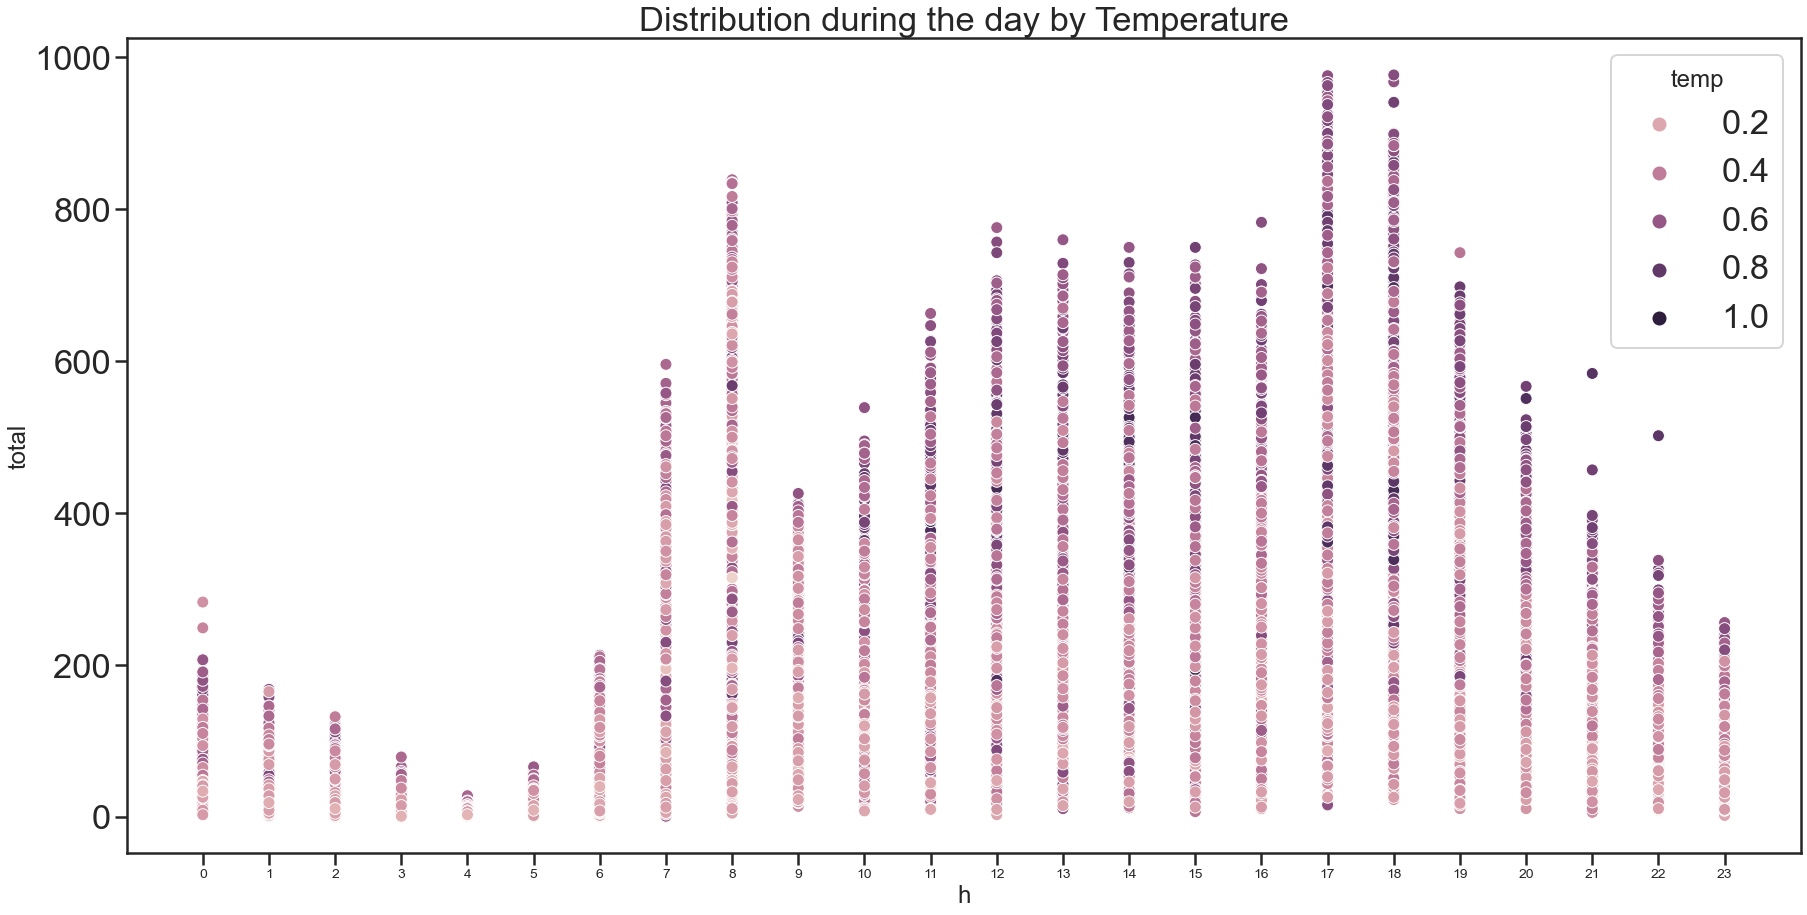

In [186]:
#Scarteplot Temp

fig,ax = plt.subplots()
sns.scatterplot(data=df[['h',
                           'total',
                           'temp']],
              x='h',
              y='total',
              hue='temp',
              
              ax=ax)
ax.set(title="Distribution during the day by Temperature");
#plt.savefig('ScartTemp.png')



In [198]:
%reset


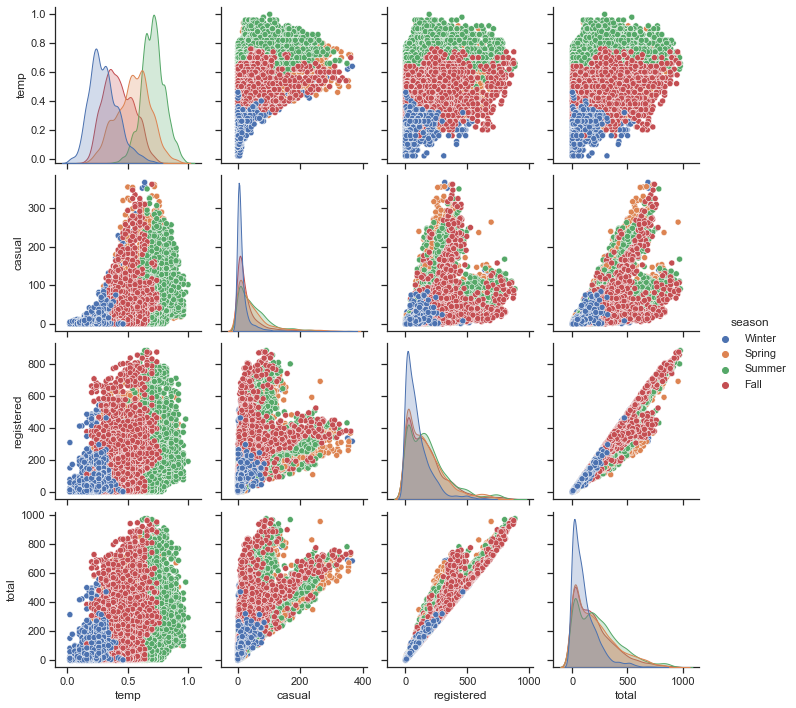

In [205]:
# # Create the default pairplot
tmp = df.iloc[:, lambda df: [1, 2, 4, 6, 7, 8, 9, 10, 13, 14, 15, 16]]
g = sns.pairplot(tmp, hue='season')
plt.show(g)


In [ ]:
# Create the default pairplot

# sns.set_theme(style="ticks")
# sns.pairplot(day_df, hue="weathersit")

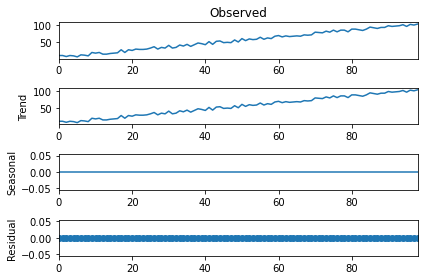

In [ ]:
# Additive Model:
# In this type of model, the components are combined by addition and the trend is linear.
# The changes over time are consistently made by the same amount. 
# The seasonality is supposed to have the same frequency (width of cycles) and amplitude (height of cycles) over time.
# y(t) = Level + Trend + Seasonality + Noise

# series = [i+randrange(10) for i in range(1,100)]
# result = seasonal_decompose(series, model='additive', period=1)
# result.plot()
# pyplot.show()

In [ ]:
#creating new column

# red_df['quality_label']= red_df['quality'].apply(lambda value: 'low' 
# if value <= 4 else 'medium'
# if value <=7 else 'high')

# white_df['quality_label']= white_df['quality'].apply(lambda value: 'low' 
# if value <= 4 else 'medium'
# if value <=7 else 'high')



In [ ]:
# Combine the two datasets into wines.

# red_df['wine_type'] = 'red'
# white_df['wine_type'] = 'white'

# wines = pd.concat([red_df, white_df])

In [ ]:
# # Re-shuffle records just to randomize data points
# wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

# wines


In [ ]:
# comparative_df= pd.concat([red_df.describe(), white_df.describe()], axis='columns', keys=['Red Wine', 'White Wine'])

# comparative_df.head()

In [ ]:
# # Pie chart wine Red/White:

# wine_ammount=pd.DataFrame(data=(wines['wine_type'].value_counts()))
# print(wine_ammount)


# labels = 'Red', 'White'
# sizes = [wine_ammount.iloc[1,0], wine_ammount.iloc[0,0]]
# explode = (0.1, 0.0)  
# # "explode" the 1st slice (Red)

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()

In [ ]:
# # Plot to show the distribution of qualities

# label_sort=pd.Categorical(['low', 'medium', 'high'], ordered=True)

# qred=pd.DataFrame(data=(red_df['quality_label'].value_counts().sort_index(level=label_sort)))
# qwhite=pd.DataFrame(data=(white_df['quality_label'].value_counts().sort_index(level=label_sort)))
# quality=pd.DataFrame(data=(wines['quality_label'].value_counts().sort_index(level=label_sort)))

# figure, axes = plt.subplots(1, 3, sharey=True)
# plt.subplots_adjust(hspace=.0)
# qwhite.plot(ax=axes[0], kind='bar', rot=0, fontsize=9, legend=None, color='y'); axes[0].set_title('White')
# qred.plot(ax=axes[1], kind='bar', rot=0, fontsize=9, legend=None, color='r'); axes[1].set_title('Red')
# quality.plot(ax=axes[2], y="quality_label", kind="bar", rot=0, fontsize=9, legend=None, color='g').set_title('Vinho Verde');
# figure.suptitle('Horizontally stacked subplots');




In [ ]:
# Vinho Verde Quality Class Distribution

# quality_sort=pd.Categorical([3,4,5,6,7,8,9], ordered=True)

# figure, axes = plt.subplots(1, 3, figsize=(12, 8), sharey=True)
# plt.subplots_adjust(hspace=.0)
# q=pd.DataFrame(data=(wines['quality'].value_counts().sort_index(level=quality_sort)))
# qred=pd.DataFrame(data=(red_df['quality'].value_counts().sort_index(level=quality_sort)))
# qwhite=pd.DataFrame(data=(white_df['quality'].value_counts().sort_index(level=quality_sort)))

# qred.plot(ax=axes[1], kind='bar', rot=0, fontsize=18, legend=None, color='r'); axes[1].set_title('Red')
# qwhite.plot(ax=axes[0], kind='bar', rot=0, fontsize=18, legend=None, color='y'); axes[0].set_title('White')
# q.plot(ax=axes[2], y="quality", kind="bar", rot=0, fontsize=18, legend=None, color='g').set_title('Agregate');

# #figure.suptitle('Vinho Verde Quality Class Distribution');
# plt.tight_layout()


In [ ]:

# # Boxplotting

# q_low=wines[wines['quality_label'] == 'low']['alcohol']
# q_medium=wines[wines['quality_label'] == 'medium']['alcohol']
# q_high=wines[wines['quality_label'] == 'high']['alcohol']

# q_label=[q_low,q_medium,q_high]

# my_boxplot = plt.boxplot(q_label, patch_artist=True, boxprops=dict(facecolor='g', color='k'), medianprops=dict(color='k'), labels=['low', 'medium', 'high'])
# my_boxplot2 = plt.boxplot(q_label, patch_artist=True, boxprops=dict(facecolor='y', color='k'), medianprops=dict(color='k'), labels=['low', 'medium', 'high'])

# # boxprops=dict(facecolor='g', color='k'), 
# # medianprops=dict(color='k')) 
# # labels=['low', 'medium', 'high'])
# plt.title("Boxplot Using Matplotlib")
# plt.show()

In [ ]:
# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# # rectangular box plot
# bplot1 = ax1.boxplot([red_df[red_df['quality_label'] == 'low']['alcohol'], red_df[red_df['quality_label'] == 'medium']['alcohol'], red_df[red_df['quality_label'] == 'high']['alcohol']],
#                      patch_artist=True,  # fill with color
#                      boxprops=dict(facecolor='r', color='k'), #Color box
#                      medianprops=dict(color='k'), #Mean color
#                      labels=['low', 'medium', 'high'])  # will be used to label x-ticks
# ax1.set_title('Red')
# ax1.set_ylabel('Alcohol %')

# bplot2 = ax2.boxplot([white_df[white_df['quality_label'] == 'low']['alcohol'], white_df[white_df['quality_label'] == 'medium']['alcohol'], white_df[white_df['quality_label'] == 'high']['alcohol']],
#                      patch_artist=True,  
#                      boxprops=dict(facecolor='y', color='k'), 
#                      medianprops=dict(color='k'), 
#                     labels=['low', 'medium', 'high'])
# ax2.set_title('White')

# plt.show()

# for column in wines.columns[0:-3]:
#     fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharey=True)
#     quality_boxplot = ax.boxplot([wines[wines['quality_label'] == 'low'][column], wines[wines['quality_label'] == 'medium'][column], wines[wines['quality_label'] == 'high'][column]],
#                      patch_artist=True,  
#                      boxprops=dict(facecolor='g', color='k'), 
#                      medianprops=dict(color='k'), 
#                     labels=['low', 'medium', 'high'])
#     ax.set_title('Quality Labels')
#     ax.set_ylabel(column)
#     plt.show()

In [ ]:
# # Alcohol level vary significantly among the low quality, medium quality and high quality wines?

# F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['alcohol'],
# wines[wines['quality_label'] == 'medium']['alcohol'],
# wines[wines['quality_label'] == 'high']['alcohol'])
# print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
# print('F Statistic:', F, '\tp-value:', p)

In [ ]:
# # Univariate Analysis Red

# red_df.hist(bins=50, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

# plt.tight_layout(rect=(0, 0, 1.2, 1.2))

# rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

In [ ]:
# #Univariate Analysis White

# white_df.hist(bins=50, color='yellow', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

# plt.tight_layout(rect=(0, 0, 1.2, 1.2))

# rt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

In [ ]:
# #Univariate Analysis Wine

# wines.hist(bins=50, color='green', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

# plt.tight_layout(rect=(0, 0, 1.2, 1.2))

# rt = plt.suptitle('Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

In [ ]:
# # Residual Sugar univarinte plot

# sugar_red=wines[wines['wine_type'] == 'red']['residual sugar']
# sugar_white=wines[wines['wine_type'] == 'white']['residual sugar']

# comparative_sugar= pd.concat([sugar_red, sugar_white], axis='columns', keys=['Red Wine', 'White Wine'])

# plt.hist(comparative_sugar, bins=30, color=('red', 'yellow'), edgecolor='black')
# plt.tight_layout(rect=(0, 0, 1.2, 1.2))
# plt.ylabel("Frequency")
# rt = plt.suptitle('Residual Sugar univarinte plot', x=0.65, y=1.25, fontsize=15)


In [ ]:
# wines[wines['quality_label'] == 'low'].count()
# wines[wines['quality_label'] == 'high'].count()

In [ ]:
# # Scarterplotinprogress

# q_low_df=wines[wines['quality_label'] == 'low']
# q3=wines[wines['quality'] == 3]


# # q_medium_df=wines[wines['quality_label'] == 'medium']
# # q_high_df=wines[wines['quality_label'] == 'high']

# # for column in q3.columns[0:-3]:
# #     plt.scatter(q3['total sulfur dioxide'], q3[column])
# #     plt.title('SO2 vs other attributes')
# #     plt.ylabel(column)
# #     plt.xlabel('SO2')
# #     plt.show()

# for column in q_low_df.columns[0:-3]:
#     plt.scatter(q_low_df['total sulfur dioxide'], q_low_df[column])
#     plt.title('SO2 vs other attributes')
#     plt.ylabel(column)
#     plt.xlabel('SO2')
#     plt.show()


In [ ]:
# # Red/White Wines - Volatile acidity other attributes and Quality

# colors = {"low": "red", "medium": "white", "high": "green"}
# q_low_df=wines[wines['quality_label'] == 'low']

# for column in wines.columns[0:-3]:
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8), sharey=False)
#     scatter = ax1.scatter(red_df["volatile acidity"], red_df[column],
#                c=red_df['quality_label'].map(colors), alpha=0.5)
#     ax1.set_xlabel("volatile acidity", fontsize=10)
#     ax1.set_ylabel(column, fontsize=10)
#     ax1.set_title('Red Wines - Volatile acidity other attributes and Quality')
#     low_quality = mpatches.Patch(color='red', label='Low Quality Label')
#     medium_quality = mpatches.Patch(color='white', label='medium')
#     high_quality = mpatches.Patch(color='green', label='High Quality Label')
#     ax1.legend(handles=[low_quality, high_quality])
#     scatter2 = ax2.scatter(white_df["volatile acidity"], white_df[column],
#                c=white_df['quality_label'].map(colors), alpha=0.5)
#     ax2.set_xlabel("volatile acidity", fontsize=10)
#     ax2.set_ylabel(column, fontsize=10)
#     ax2.set_title('White Wines - Volatile acidity other attributes and Quality')
#     low_quality = mpatches.Patch(color='red', label='Low Quality Label')
#     medium_quality = mpatches.Patch(color='white', label='medium')
#     high_quality = mpatches.Patch(color='green', label='High Quality Label')
#     ax2.legend(handles=[low_quality, high_quality])
#     plt.show()
    



In [ ]:
# # Red/White Wines - Residual Sugar other attributes and Quality

# colors = {"low": "red", "medium": "yellow", "high": "green"}
# q_low_df=wines[wines['quality_label'] == 'low']

# for column in wines.columns[0:-3]:
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
#     scatter = ax1.scatter(red_df["residual sugar"], red_df[column],
#                c=red_df['quality_label'].map(colors), alpha=0.5)
#     ax1.set_xlabel("residual sugar", fontsize=10)
#     ax1.set_ylabel(column, fontsize=10)
#     ax1.set_title('Red Wines - Residual Sugar other attributes and Quality')
#     low_quality = mpatches.Patch(color='red', label='Low Quality')
#     medium_quality = mpatches.Patch(color='yellow', label='Medium Quality')
#     high_quality = mpatches.Patch(color='green', label='High Quality')
#     ax1.legend(handles=[low_quality, medium_quality, high_quality])
#     scatter2 = ax2.scatter(white_df["residual sugar"], white_df[column],
#                c=white_df['quality_label'].map(colors), alpha=0.5)
#     ax2.set_xlabel("residual sugar", fontsize=10)
#     ax2.set_ylabel(column, fontsize=10)
#     ax2.set_title('White Wines - Residual Sugar, other attributes and Quality')
#     low_quality = mpatches.Patch(color='red', label='Low Quality')
#     medium_quality = mpatches.Patch(color='yellow', label='Medium Quality')
#     high_quality = mpatches.Patch(color='green', label='High Quality')
#     ax2.legend(handles=[low_quality, medium_quality,high_quality])
#     plt.show()

In [ ]:
# # Low/High Wines - Residual Sugar other attributes and Quality

# colors = {"red": "red", "white": "green"}
# q_low_df=wines[wines['quality_label'] == 'low']
# q_high_df=wines[wines['quality_label'] == 'high']


# for column in wines.columns[0:-3]:
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8), sharey=True, sharex=True)
#     scatter = ax1.scatter(q_low_df["residual sugar"], q_low_df[column],
#                c=q_low_df['wine_type'].map(colors), alpha=0.5)
#     ax1.set_xlabel("residual sugar", fontsize=10)
#     ax1.set_ylabel(column, fontsize=10)
#     ax1.set_title('Low Quality Wines - Residual Sugar other attributes')
#     red_quality = mpatches.Patch(color='red', label='Red Wine')
#     white_quality = mpatches.Patch(color='green', label='White Wines')
#     ax1.legend(handles=[red_quality, white_quality])
#     scatter2 = ax2.scatter(q_high_df["residual sugar"], q_high_df[column],
#                c=q_high_df['wine_type'].map(colors), alpha=0.5)
#     ax2.set_xlabel("residual sugar", fontsize=10)
#     ax2.set_ylabel(column, fontsize=10)
#     ax2.set_title('High Quality Wines - Residual Sugar other attributes')
#     red_quality = mpatches.Patch(color='red', label='Red Wine')
#     white_quality = mpatches.Patch(color='green', label='White Wines')
#     ax2.legend(handles=[red_quality, white_quality])
#     plt.show()

In [ ]:
# # Low/High Wines - Free sulfur Dioxide other attributes and Quality

# colors = {"red": "red", "white": "green"}
# q_low_df=wines[wines['quality_label'] == 'low']
# q_high_df=wines[wines['quality_label'] == 'high']


# for column in wines.columns[0:-3]:
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8), sharey=True, sharex=True)
#     scatter = ax1.scatter(q_low_df["free sulfur dioxide"], q_low_df[column],
#                c=q_low_df['wine_type'].map(colors), alpha=0.5)
#     ax1.set_xlabel("free sulfur dioxide", fontsize=10)
#     ax1.set_ylabel(column, fontsize=10)
#     ax1.set_title('Low Quality Wines - Free Sulfur Dioxide other attributes')
#     red_quality = mpatches.Patch(color='red', label='Red Wine')
#     white_quality = mpatches.Patch(color='green', label='White Wines')
#     ax1.legend(handles=[red_quality, white_quality])
#     scatter2 = ax2.scatter(q_high_df["free sulfur dioxide"], q_high_df[column],
#                c=q_high_df['wine_type'].map(colors), alpha=0.5)
#     ax2.set_xlabel("free sulfur dioxide", fontsize=10)
#     ax2.set_ylabel(column, fontsize=10)
#     ax2.set_title('High Quality Wines - Free Sulfur Dioxide other attributes')
#     red_quality = mpatches.Patch(color='red', label='Red Wine')
#     white_quality = mpatches.Patch(color='green', label='White Wines')
#     ax2.legend(handles=[red_quality, white_quality])
#     plt.show()

In [ ]:
#Boxplot mode Killian mode

# for column in wines.columns[0 : -3]:
#         quality_list = ['low', 'medium-low', 'medium', 'medium-high', 'high']
#         quality_column = {}
#         colors = []
#         fig = plt.figure(figsize=(12, 4), dpi=100)
#         for i in quality_list:
#                 for j in wines[wines["quality_label"] == i]["wine_type"].unique():
#                         label = i + " " + j
#                         quality_column[label] = wines[(wines['quality_label']==i) & (wines["wine_type"]==j)][column]
#                         colors.append("khaki" if j == "white" else "darkred")
#         bplot = plt.boxplot([x for x in quality_column.values()],labels=[x for x in quality_column.keys()], patch_artist=True, showfliers=False)
#         for patch, color in zip(bplot['boxes'], colors):
#                 patch.set_facecolor(color)
#                 plt.tight_layout()
#         plt.xlabel('Quality') 
#         plt.ylabel(column)
#         plt.show();

In [ ]:
# # Wine Attributes Correlation Heatmap

# wines_colums = ["fixed acidity", "volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
# wines_corr = np.around(wines.corr(method='pearson', min_periods=1).to_numpy(), decimals=1)

# fig, ax = plt.subplots()
# im = ax.imshow(wines_corr)

# # We want to show all ticks...
# ax.set_xticks(np.arange(len(wines_colums)))
# ax.set_yticks(np.arange(len(wines_colums)))
# # # ... and label them with the respective list entries
# ax.set_xticklabels(wines_colums)
# ax.set_yticklabels(wines_colums)

# # Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")

# # Loop over data dimensions and create text annotations.
# for i in range(len(wines_colums)):
#     for j in range(len(wines_colums)):
#         text = ax.text(j, i, wines_corr[i, j],
#                        ha="center", va="center", color="w")

# ax.set_title("Wine Attributes Correlation Heatmap")
# fig.tight_layout()
# fig.set_figheight(100)
# plt.show()


In [ ]:
# # Comparative Attributes Correlation Heatmap - Red/White
 
# wines_colums = ["fixed acidity", "volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
# red_corr = np.around(red_df.corr(method='pearson', min_periods=1).to_numpy(), decimals=1)
# white_corr = np.around(white_df.corr(method='pearson', min_periods=1).to_numpy(), decimals=1)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# im1 = ax1.imshow(red_corr)
# ax1.set_xticks(np.arange(len(wines_colums)))
# ax1.set_yticks(np.arange(len(wines_colums)))
# ax1.set_xticklabels(wines_colums)
# ax1.set_yticklabels(wines_colums)
# plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")
# for i in range(len(wines_colums)):
#     for j in range(len(wines_colums)):
#         text = ax1.text(j, i, red_corr[i, j],
#                        ha="center", va="center", color="w")
# ax1.set_title("Red Wine Attributes Correlation Heatmap")

# im2 = ax2.imshow(white_corr)
# ax2.set_xticks(np.arange(len(wines_colums)))
# ax2.set_yticks(np.arange(len(wines_colums)))
# ax2.set_xticklabels(wines_colums)
# ax2.set_yticklabels(wines_colums)
# plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")
# for i in range(len(wines_colums)):
#     for j in range(len(wines_colums)):
#         text = ax2.text(j, i, white_corr[i, j],
#                        ha="center", va="center", color="w")
# ax2.set_title("White Wine Attributes Correlation Heatmap")



# fig.tight_layout()
# #fig.set_figheight(100)
# plt.show()

In [ ]:
# Comparative Attributes Correlation Heatmap - Red/White fixed acidity", "volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide"
 
# wines_colums = ["fixed acidity", "volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide"]

# red2=pd.DataFrame(data=(red_df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide']]))
# red2_corr = np.around(red2.corr(method='pearson', min_periods=1).to_numpy(), decimals=1)
# white2=pd.DataFrame(data=(white_df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide']]))
# white2_corr = np.around(white2.corr(method='pearson', min_periods=1).to_numpy(), decimals=1)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# im1 = ax1.imshow(red2_corr)
# ax1.set_xticks(np.arange(len(wines_colums)))
# ax1.set_yticks(np.arange(len(wines_colums)))
# ax1.set_xticklabels(wines_colums)
# ax1.set_yticklabels(wines_colums)
# plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")
# for i in range(len(wines_colums)):
#     for j in range(len(wines_colums)):
#         text = ax1.text(j, i, red_corr[i, j],
#                        ha="center", va="center", color="w")
# ax1.set_title("Red Wine Attributes Correlation Heatmap")

# im2 = ax2.imshow(white2_corr)
# ax2.set_xticks(np.arange(len(wines_colums)))
# ax2.set_yticks(np.arange(len(wines_colums)))
# ax2.set_xticklabels(wines_colums)
# ax2.set_yticklabels(wines_colums)
# plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")
# for i in range(len(wines_colums)):
#     for j in range(len(wines_colums)):
#         text = ax2.text(j, i, white_corr[i, j],
#                        ha="center", va="center", color="w")
# ax2.set_title("White Wine Attributes Correlation Heatmap")



# fig.tight_layout()
# #fig.set_figheight(100)
# plt.show()

In [ ]:
# # Red Wines - Sulphates, Alcohol and Quality

# import matplotlib.patches as mpatches


# colors = {"low": "khaki", "medium": "orange", "high": "navy"}

# fig, ax = plt.subplots()
# scatter = ax.scatter(red_df["alcohol"], red_df["sulphates"],
#            c=red_df['quality_label'].map(colors), alpha=0.5)
# ax.set_xlabel("alcohol", fontsize=10)
# ax.set_ylabel("sulphates", fontsize=10)
# ax.set_title('Red Wines - Sulphates, Alcohol and Quality')

# low_quality = mpatches.Patch(color='khaki', label='low')
# medium_quality = mpatches.Patch(color='orange', label='medium')
# high_quality = mpatches.Patch(color='navy', label='high')

# ax.legend(handles=[low_quality, medium_quality, high_quality])

# plt.show()

In [ ]:
# colors = {"low": "khaki", "medium": "orange", "high": "navy"}

# fig, ax = plt.subplots()
# scatter = ax.scatter(wines["volatile acidity"], wines["sulphates"],
#            c=wines['quality_label'].map(colors), alpha=0.5)
# ax.set_xlabel("volatile acidity", fontsize=10)
# ax.set_ylabel("sulphates", fontsize=10)
# ax.set_title('Wines - Sulphates, Volatile acidity and Quality')

# low_quality = mpatches.Patch(color='khaki', label='low')
# medium_quality = mpatches.Patch(color='orange', label='medium')
# high_quality = mpatches.Patch(color='navy', label='high')

# ax.legend(handles=[low_quality, medium_quality, high_quality])

# plt.show()

In [ ]:
# # Multivariate visualization


# for column in wines.columns[0:-3]:
#     fig = plt.figure()
#     gs = GridSpec(4, 4)
#     ax_scatter = fig.add_subplot(gs[1:4, 0:3])
#     ax_hist_x = fig.add_subplot(gs[0,0:3])
#     ax_hist_y = fig.add_subplot(gs[1:4, 3])
#     ax_scatter.scatter(wines['quality'], wines[column])
#     ax_hist_x.hist(wines['quality'])
#     ax_hist_y.hist(wines[column], orientation = 'horizontal')
#     plt.title('Frequency')
#     plt.ylabel(column)
#     fig.suptitle('Quality vs other attributes');
#     fig.tight_layout()
#     plt.show()
# plt.show()

In [ ]:
# Interesting Positive Corelations 1:

# 1. Density/Residual sugar_red
# 2. Total SO2/Fre SO2
# 3. Density/Fixed acidity (RED)
# 4. Citric Acid/Fixed Acidity (RED)
# 5. Quality/Alchool

# # wines_colums = ["fixed acidity","citric acid","residual sugar","free sulfur dioxide","total sulfur dioxide","density","alcohol"]
# wines_colum_y = ["density","total sulfur dioxide", "fixed acidity", "citric acid", "alcohol"]
# # wines_colum_x = ["residual sugar","free sulfur dioxide", "density", "fixed acidity", "quality"]

# colors = {"red": "red", "white": "green"}
# q_low_df=wines[wines['quality_label'] == 'low']
# q_high_df=wines[wines['quality_label'] == 'high']


# for column in wines_colum_y:
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8), sharey=True, sharex=True)
#     scatter = ax1.scatter(q_low_df["residual sugar"], q_low_df[column],
#                c=q_low_df['wine_type'].map(colors), alpha=0.5)
#     ax1.set_xlabel("residual sugar", fontsize=10)
#     ax1.set_ylabel(column, fontsize=10)
#     ax1.set_title('Low Quality Wines - Positive Corelation Between Attributes')
#     red_quality = mpatches.Patch(color='red', label='Red Wine')
#     white_quality = mpatches.Patch(color='green', label='White Wines')
#     ax1.legend(handles=[red_quality, white_quality])
#     scatter2 = ax2.scatter(q_high_df["residual sugar"], q_high_df[column],
#                c=q_high_df['wine_type'].map(colors), alpha=0.5)
#     ax2.set_xlabel("residual sugar", fontsize=10)
#     ax2.set_ylabel(column, fontsize=10)
#     ax2.set_title('High Quality Wines - Positive Corelation Between Attributes')
#     red_quality = mpatches.Patch(color='red', label='Red Wine')
#     white_quality = mpatches.Patch(color='green', label='White Wines')
#     ax2.legend(handles=[red_quality, white_quality])
#     plt.show()


In [ ]:
# # Interesting Positive Corelations 2:


# #wines_colum_x = ["residual sugar","free sulfur dioxide", "density", "fixed acidity", "quality"]

# colors = {"red": "red", "white": "green"}
# q_low_df=wines[wines['quality_label'] == 'low']
# q_high_df=wines[wines['quality_label'] == 'high']

# wines_colum_y = ["density","total sulfur dioxide", "fixed acidity", "citric acid", "alcohol"]


# # 1. Density/Residual sugar
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8), sharey=True, sharex=True)
# scatter = ax1.scatter(q_low_df["residual sugar"], q_low_df["density"],
#     c=q_low_df['wine_type'].map(colors), alpha=0.5)
# ax1.set_xlabel("residual sugar", fontsize=10)
# ax1.set_ylabel("density", fontsize=10)
# ax1.set_title('Low Quality Wines - Positive Corelation Between Density/Residual sugar')
# red_quality = mpatches.Patch(color='red', label='Red Wine')
# white_quality = mpatches.Patch(color='green', label='White Wines')
# ax1.legend(handles=[red_quality, white_quality])

# scatter2 = ax2.scatter(q_high_df["residual sugar"], q_high_df["density"],
#     c=q_high_df['wine_type'].map(colors), alpha=0.5)
# ax2.set_xlabel("residual sugar", fontsize=10)
# ax2.set_ylabel("density", fontsize=10)
# ax2.set_title('High Quality Wines - Positive Corelation Between Density/Residual sugar')
# red_quality = mpatches.Patch(color='red', label='Red Wine')
# white_quality = mpatches.Patch(color='green', label='White Wines')
# ax2.legend(handles=[red_quality, white_quality])

# plt.show()

# # 2. Total SO2/Fre SO2
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8), sharey=True, sharex=True)
# scatter = ax1.scatter(q_low_df["total sulfur dioxide"], q_low_df["free sulfur dioxide"],
#     c=q_low_df['wine_type'].map(colors), alpha=0.5)
# ax1.set_xlabel("total sulfur dioxide", fontsize=10)
# ax1.set_ylabel("free sulfur dioxide", fontsize=10)
# ax1.set_title('Low Quality Wines - Positive Corelation Between Total SO2/Fre SO2')
# red_quality = mpatches.Patch(color='red', label='Red Wine')
# white_quality = mpatches.Patch(color='green', label='White Wines')
# ax1.legend(handles=[red_quality, white_quality])

# scatter2 = ax2.scatter(q_high_df["total sulfur dioxide"], q_high_df["free sulfur dioxide"],
#     c=q_high_df['wine_type'].map(colors), alpha=0.5)
# ax2.set_xlabel("total sulfur dioxide", fontsize=10)
# ax2.set_ylabel("free sulfur dioxide", fontsize=10)
# ax2.set_title('High Quality Wines - Positive Corelation Between Total SO2/Fre SO2')
# red_quality = mpatches.Patch(color='red', label='Red Wine')
# white_quality = mpatches.Patch(color='green', label='White Wines')
# ax2.legend(handles=[red_quality, white_quality])

# plt.show()

# # 3. Density/Fixed acidity (RED)
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8), sharey=True, sharex=True)
# scatter = ax1.scatter(q_low_df["density"], q_low_df["fixed acidity"],
#     c=q_low_df['wine_type'].map(colors), alpha=0.5)
# ax1.set_xlabel("density", fontsize=10)
# ax1.set_ylabel("fixed acidity", fontsize=10)
# ax1.set_title('Low Quality Wines - Positive Corelation Between Density/Fixed acidity (RED)')
# red_quality = mpatches.Patch(color='red', label='Red Wine')
# white_quality = mpatches.Patch(color='green', label='White Wines')
# ax1.legend(handles=[red_quality, white_quality])

# scatter2 = ax2.scatter(q_high_df["density"], q_high_df["fixed acidity"],
#     c=q_high_df['wine_type'].map(colors), alpha=0.5)
# ax2.set_xlabel("density", fontsize=10)
# ax2.set_ylabel("fixed acidity", fontsize=10)
# ax2.set_title('High Quality Wines - Positive Corelation Between Density/Fixed acidity (RED)')
# red_quality = mpatches.Patch(color='red', label='Red Wine')
# white_quality = mpatches.Patch(color='green', label='White Wines')
# ax2.legend(handles=[red_quality, white_quality])

# plt.show()

# # 4. Citric Acid/Fixed Acidity (RED)
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8), sharey=True, sharex=True)
# scatter = ax1.scatter(q_low_df["citric acid"], q_low_df["fixed acidity"],
#     c=q_low_df['wine_type'].map(colors), alpha=0.5)
# ax1.set_xlabel("citric acid", fontsize=10)
# ax1.set_ylabel("fixed acidity", fontsize=10)
# ax1.set_title('Low Quality Wines - Positive Corelation Between Citric Acid/Fixed Acidity (RED)')
# red_quality = mpatches.Patch(color='red', label='Red Wine')
# white_quality = mpatches.Patch(color='green', label='White Wines')
# ax1.legend(handles=[red_quality, white_quality])

# scatter2 = ax2.scatter(q_high_df["citric acid"], q_high_df["fixed acidity"],
#     c=q_high_df['wine_type'].map(colors), alpha=0.5)
# ax2.set_xlabel("citric acid", fontsize=10)
# ax2.set_ylabel("fixed acidity", fontsize=10)
# ax2.set_title('High Quality Wines - Positive Corelation Between Citric Acid/Fixed Acidity (RED)')
# red_quality = mpatches.Patch(color='red', label='Red Wine')
# white_quality = mpatches.Patch(color='green', label='White Wines')
# ax2.legend(handles=[red_quality, white_quality])

# plt.show()

# # 5. Quality/Alchool
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8), sharey=True, sharex=True)
# scatter = ax1.scatter(q_low_df["quality"], q_low_df["alcohol"],
#     c=q_low_df['wine_type'].map(colors), alpha=0.5)
# ax1.set_xlabel("quality", fontsize=10)
# ax1.set_ylabel("alcohol", fontsize=10)
# ax1.set_title('Low Quality Wines - Positive Corelation Between Quality/Alchool')
# red_quality = mpatches.Patch(color='red', label='Red Wine')
# white_quality = mpatches.Patch(color='green', label='White Wines')
# ax1.legend(handles=[red_quality, white_quality])

# scatter2 = ax2.scatter(q_high_df["quality"], q_high_df["alcohol"],
#     c=q_high_df['wine_type'].map(colors), alpha=0.5)
# ax2.set_xlabel("quality", fontsize=10)
# ax2.set_ylabel("alcohol", fontsize=10)
# ax2.set_title('High Quality Wines - Positive Corelation Between Quality/Alchool')
# red_quality = mpatches.Patch(color='red', label='Red Wine')
# white_quality = mpatches.Patch(color='green', label='White Wines')
# ax2.legend(handles=[red_quality, white_quality])

# plt.show()

In [ ]:
# # Interesting Negative Corelations:

# # 1. Density/Alcohol
# # 2. ph/fix acidity (RED)
# # 3. Residual sugar/Alcohol (White)
# # 4. Citric Acid/ph (RED)
# # 5. Citric Acid/volatile acidity (RED)

# colors = {"red": "red", "white": "green"}
# q_low_df=wines[wines['quality_label'] == 'low']
# q_high_df=wines[wines['quality_label'] == 'high']
# wines_colums = ["fixed acidity", "volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]


# # 1. Density/Alcohol
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8), sharey=True, sharex=True)
# scatter = ax1.scatter(q_low_df["alcohol"], q_low_df["density"],
#     c=q_low_df['wine_type'].map(colors), alpha=0.5)
# ax1.set_xlabel("alcohol", fontsize=10)
# ax1.set_ylabel("density", fontsize=10)
# ax1.set_title('Low Quality Wines - Negative Corelation Between Alcohol/Density')
# red_quality = mpatches.Patch(color='red', label='Red Wine')
# white_quality = mpatches.Patch(color='green', label='White Wines')
# ax1.legend(handles=[red_quality, white_quality])

# scatter2 = ax2.scatter(q_high_df["alcohol"], q_high_df["density"],
#     c=q_high_df['wine_type'].map(colors), alpha=0.5)
# ax2.set_xlabel("alcohol", fontsize=10)
# ax2.set_ylabel("density", fontsize=10)
# ax2.set_title('High Quality Wines - Negative Corelation Between Alcohol/Density')
# red_quality = mpatches.Patch(color='red', label='Red Wine')
# white_quality = mpatches.Patch(color='green', label='White Wines')
# ax2.legend(handles=[red_quality, white_quality])

# plt.show()

# # 2. ph/fixed acidity (RED)
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8), sharey=True, sharex=True)
# scatter = ax1.scatter(q_low_df["pH"], q_low_df["fixed acidity"],
#     c=q_low_df['wine_type'].map(colors), alpha=0.5)
# ax1.set_xlabel("pH", fontsize=10)
# ax1.set_ylabel("fixed acidity", fontsize=10)
# ax1.set_title('Low Quality Wines - Negative Corelation Between ph/fixed acidity (Red)')
# red_quality = mpatches.Patch(color='red', label='Red Wine')
# white_quality = mpatches.Patch(color='green', label='White Wines')
# ax1.legend(handles=[red_quality, white_quality])

# scatter2 = ax2.scatter(q_high_df["pH"], q_high_df["fixed acidity"],
#     c=q_high_df['wine_type'].map(colors), alpha=0.5)
# ax2.set_xlabel("pH", fontsize=10)
# ax2.set_ylabel("fixed acidity", fontsize=10)
# ax2.set_title('High Quality Wines - pH/fixed acidity (Red)')
# red_quality = mpatches.Patch(color='red', label='Red Wine')
# white_quality = mpatches.Patch(color='green', label='White Wines')
# ax2.legend(handles=[red_quality, white_quality])

# plt.show()

# # 3. Residual sugar/Alcohol (White)
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8), sharey=True, sharex=True)
# scatter = ax1.scatter(q_low_df["residual sugar"], q_low_df["alcohol"],
#     c=q_low_df['wine_type'].map(colors), alpha=0.5)
# ax1.set_xlabel("residual sugar", fontsize=10)
# ax1.set_ylabel("alcohol", fontsize=10)
# ax1.set_title('Low Quality Wines - Negative Corelation Between Residual Sugar/Alcohol (White)')
# red_quality = mpatches.Patch(color='red', label='Red Wine')
# white_quality = mpatches.Patch(color='green', label='White Wines')
# ax1.legend(handles=[red_quality, white_quality])

# scatter2 = ax2.scatter(q_high_df["residual sugar"], q_high_df["alcohol"],
#     c=q_high_df['wine_type'].map(colors), alpha=0.5)
# ax2.set_xlabel("residual sugar", fontsize=10)
# ax2.set_ylabel("alcohol", fontsize=10)
# ax2.set_title('High Quality Wines - Negative Corelation Between Density/Alcohol (White)')
# red_quality = mpatches.Patch(color='red', label='Red Wine')
# white_quality = mpatches.Patch(color='green', label='White Wines')
# ax2.legend(handles=[red_quality, white_quality])

# plt.show()

# # 4. Citric Acid/ph (RED)
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8), sharey=True, sharex=True)
# scatter = ax1.scatter(q_low_df["citric acid"], q_low_df["pH"],
#     c=q_low_df['wine_type'].map(colors), alpha=0.5)
# ax1.set_xlabel("citric acid", fontsize=10)
# ax1.set_ylabel("pH", fontsize=10)
# ax1.set_title('Low Quality Wines - Negative Corelation Between Citric Acid/pH (RED)')
# red_quality = mpatches.Patch(color='red', label='Red Wine')
# white_quality = mpatches.Patch(color='green', label='White Wines')
# ax1.legend(handles=[red_quality, white_quality])

# scatter2 = ax2.scatter(q_high_df["citric acid"], q_high_df["pH"],
#     c=q_high_df['wine_type'].map(colors), alpha=0.5)
# ax2.set_xlabel("citric acid", fontsize=10)
# ax2.set_ylabel("pH", fontsize=10)
# ax2.set_title('High Quality Wines - Negative Corelation Between Citric Acid/pH (RED)')
# red_quality = mpatches.Patch(color='red', label='Red Wine')
# white_quality = mpatches.Patch(color='green', label='White Wines')
# ax2.legend(handles=[red_quality, white_quality])

# plt.show()

# # 5. Citric Acid/volatile acidity (RED)
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8), sharey=True, sharex=True)
# scatter = ax1.scatter(q_low_df["citric acid"], q_low_df["volatile acidity"],
#     c=q_low_df['wine_type'].map(colors), alpha=0.5)
# ax1.set_xlabel("citric acid", fontsize=10)
# ax1.set_ylabel("volatile acidity", fontsize=10)
# ax1.set_title('Low Quality Wines - Negative Corelation Between Citric Acid/Volatile acidity (RED)')
# red_quality = mpatches.Patch(color='red', label='Red Wine')
# white_quality = mpatches.Patch(color='green', label='White Wines')
# ax1.legend(handles=[red_quality, white_quality])

# scatter2 = ax2.scatter(q_high_df["citric acid"], q_high_df["volatile acidity"],
#     c=q_high_df['wine_type'].map(colors), alpha=0.5)
# ax2.set_xlabel("citric acid", fontsize=10)
# ax2.set_ylabel("volatile acidity", fontsize=10)
# ax2.set_title('High Quality Wines - Negative Corelation Between Citric Acid/Volatile acidity (RED)')
# red_quality = mpatches.Patch(color='red', label='Red Wine')
# white_quality = mpatches.Patch(color='green', label='White Wines')
# ax2.legend(handles=[red_quality, white_quality])

# plt.show()

In [ ]:
# ML Model Setup

# Treat Data:
# 1. Split data --> Train vs Test
# 2. Scale data: Robust scaler (with outliers)

# Relevant Variables according Data Exploring:
# 1. Residual Sugar
# 2. Density
# 3. Alcohol
# 4. Free SO2

# Models:
# 1. Linear Regretion


In [ ]:
# # 1. Split Data

# from sklearn.model_selection import train_test_split
# from collections import Counter

# X = wines.iloc[:,:-3]
# wtp_feature_names = wtp_features.columns
# y = np.array(wines['wine_type'])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=wines.wine_type)

# print(Counter(y_train), Counter(y_test))
# print('Features:', list(wtp_feature_names))


In [ ]:
# # 2. Scale Data

# #from sklearn.preprocessing import RobustScaler
# rs=RobustScaler()

# X_train = rs.fit_transform(X_train)
# X_test = rs.fit_transform(X_test)


In [ ]:
%reset